In [2]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

# Importing and Reading Combined Data

In [3]:
df = pd.read_csv('combined.csv')
df

,latitude,longitude,blk_no,road_name,postal_code,address,cbd_dist,min_dist_mrt,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,remaining_lease
0,1.294801,103.854467,1,BEACH ROAD,189673.0,1 BEACH RD,1351.713661,143.728945,2015-01,KALLANG/WHAMPOA,3 ROOM,1,BEACH RD,04 TO 06,74.0,Improved,1979.0,388000.0,63
1,1.294801,103.854467,1,BEACH ROAD,189673.0,1 BEACH RD,1351.713661,143.728945,2016-03,KALLANG/WHAMPOA,3 ROOM,1,BEACH RD,07 TO 09,68.0,Improved,1979.0,350000.0,62
2,1.294801,103.854467,1,BEACH ROAD,189673.0,1 BEACH RD,1351.713661,143.728945,2017-04,KALLANG/WHAMPOA,3 ROOM,1,BEACH RD,07 TO 09,68.0,Improved,1979.0,340000.0,61 years 05 months
3,1.294801,103.854467,1,BEACH ROAD,189673.0,1 BEACH RD,1351.713661,143.728945,2017-05,KALLANG/WHAMPOA,3 ROOM,1,BEACH RD,07 TO 09,68.0,Improved,1979.0,322000.0,61 years 05 months
4,1.294801,103.854467,1,BEACH ROAD,189673.0,1 BEACH RD,1351.713661,143.728945,2017-06,KALLANG/WHAMPOA,3 ROOM,1,BEACH RD,07 TO 09,68.0,Improved,1979.0,370000.0,61 years 03 months
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
232290,1.286814,103.828928,9B,BOON TIONG ROAD,163009.0,9B BOON TIONG RD,2525.251132,182.864524,2023-12,BUKIT MERAH,5 ROOM,9B,BOON TIONG RD,19 TO 21,112.0,Improved,2016.0,1400000.0,91 years 02 months
232291,1.286814,103.828928,9B,BOON TIONG ROAD,163009.0,9B BOON TIONG RD,2525.251132,182.864524,2024-03,BUKIT MERAH,4 ROOM,9B,BOON TIONG RD,25 TO 27,92.0,Model A,2016.0,1188000.0,90 years 11 months
232292,1.286814,103.828928,9B,BOON TIONG ROAD,163009.0,9B BOON TIONG RD,2525.251132,182.864524,2024-06,BUKIT MERAH,5 ROOM,9B,BOON TIONG RD,34 TO 36,112.0,Improved,2016.0,1588000.0,90 years 08 months
232293,1.286814,103.828928,9B,BOON TIONG ROAD,163009.0,9B BOON TIONG RD,2525.251132,182.864524,2024-07,BUKIT MERAH,4 ROOM,9B,BOON TIONG RD,10 TO 12,92.0,Model A,2016.0,1100000.0,90 years 07 months


In [4]:
df.dtypes

latitude               float64
longitude              float64
blk_no                  object
road_name               object
postal_code             object
address                 object
cbd_dist               float64
min_dist_mrt           float64
month                   object
town                    object
flat_type               object
block                   object
street_name             object
storey_range            object
floor_area_sqm         float64
flat_model              object
lease_commence_date    float64
resale_price           float64
remaining_lease         object
dtype: object

In [5]:
# Convert 'postal_code' to int64
df['postal_code'] = pd.to_numeric(df['postal_code'], errors='coerce').fillna(0).astype('int64')

# Convert 'lease_commence_date' to int64
df['lease_commence_date'] = pd.to_numeric(df['lease_commence_date'], errors='coerce').fillna(0).astype('int64')

# Extract lease remaining years from 'remaining_lease' and create 'lease_remain_years' as int64
def extract_lease_years(remaining_lease):
    try:
        years = int(remaining_lease.split(' ')[0])  # Extract the number of years
        return years
    except:
        return 0  # Return 0 for invalid or missing values

df['lease_remain_years'] = df['remaining_lease'].apply(extract_lease_years)

# Ensure 'lease_remain_years' is int64
df['lease_remain_years'] = df['lease_remain_years'].astype('int64')

# Verify the data types
print(df.dtypes)


latitude               float64
longitude              float64
blk_no                  object
road_name               object
postal_code              int64
address                 object
cbd_dist               float64
min_dist_mrt           float64
month                   object
town                    object
flat_type               object
block                   object
street_name             object
storey_range            object
floor_area_sqm         float64
flat_model              object
lease_commence_date      int64
resale_price           float64
remaining_lease         object
lease_remain_years       int64
dtype: object


In [6]:
# Fill categorical columns with 'Unknown'
categorical_columns = ['blk_no', 'road_name', 'address']
for col in categorical_columns:
    df[col].fillna('Unknown', inplace=True)

# Fill numeric columns with the median
numeric_columns = ['latitude', 'longitude', 'cbd_dist', 'min_dist_mrt']
for col in numeric_columns:
    df[col].fillna(df[col].median(), inplace=True)

# Fill 'address' column where all values are missing
if df['address'].isnull().all():
    df['address'] = 'Unavailable'

# Handle storey_range (assuming "X TO Y" format is typical)
df['storey_range'].fillna('0 TO 0', inplace=True)

# For remaining columns, fill missing values with mode or appropriate strategy
remaining_columns = ['month', 'town', 'flat_type', 'block', 'street_name',
                     'floor_area_sqm', 'flat_model', 'lease_commence_date',
                     'resale_price', 'remaining_lease']

for col in remaining_columns:
    df[col].fillna(df[col].mode()[0], inplace=True)

# Verify missing values are handled
print(df.isnull().sum())


latitude               0
longitude              0
blk_no                 0
road_name              0
postal_code            0
address                0
cbd_dist               0
min_dist_mrt           0
month                  0
town                   0
flat_type              0
block                  0
street_name            0
storey_range           0
floor_area_sqm         0
flat_model             0
lease_commence_date    0
resale_price           0
remaining_lease        0
lease_remain_years     0
dtype: int64


In [7]:
df.isnull().sum()

latitude               0
longitude              0
blk_no                 0
road_name              0
postal_code            0
address                0
cbd_dist               0
min_dist_mrt           0
month                  0
town                   0
flat_type              0
block                  0
street_name            0
storey_range           0
floor_area_sqm         0
flat_model             0
lease_commence_date    0
resale_price           0
remaining_lease        0
lease_remain_years     0
dtype: int64

# Minor Data Preprocessing for Combined Data

In [8]:
import statistics

def get_median(x):
    if isinstance(x, str):  # Ensure the value is a string
        try:
            split_list = x.split(' TO ')
            float_list = [float(i) for i in split_list]
            median = statistics.median(float_list)
            return median
        except (ValueError, IndexError):
            return None  # Return None for invalid formats
    return None  # Return None for non-string values

# Apply the function to the column
df['storey_median'] = df['storey_range'].apply(lambda x: get_median(x))

df

,latitude,longitude,blk_no,road_name,postal_code,address,cbd_dist,min_dist_mrt,month,town,...,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,remaining_lease,lease_remain_years,storey_median
0,1.294801,103.854467,1,BEACH ROAD,189673,1 BEACH RD,1351.713661,143.728945,2015-01,KALLANG/WHAMPOA,...,1,BEACH RD,04 TO 06,74.0,Improved,1979,388000.0,63,63,5.0
1,1.294801,103.854467,1,BEACH ROAD,189673,1 BEACH RD,1351.713661,143.728945,2016-03,KALLANG/WHAMPOA,...,1,BEACH RD,07 TO 09,68.0,Improved,1979,350000.0,62,62,8.0
2,1.294801,103.854467,1,BEACH ROAD,189673,1 BEACH RD,1351.713661,143.728945,2017-04,KALLANG/WHAMPOA,...,1,BEACH RD,07 TO 09,68.0,Improved,1979,340000.0,61 years 05 months,61,8.0
3,1.294801,103.854467,1,BEACH ROAD,189673,1 BEACH RD,1351.713661,143.728945,2017-05,KALLANG/WHAMPOA,...,1,BEACH RD,07 TO 09,68.0,Improved,1979,322000.0,61 years 05 months,61,8.0
4,1.294801,103.854467,1,BEACH ROAD,189673,1 BEACH RD,1351.713661,143.728945,2017-06,KALLANG/WHAMPOA,...,1,BEACH RD,07 TO 09,68.0,Improved,1979,370000.0,61 years 03 months,61,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
232290,1.286814,103.828928,9B,BOON TIONG ROAD,163009,9B BOON TIONG RD,2525.251132,182.864524,2023-12,BUKIT MERAH,...,9B,BOON TIONG RD,19 TO 21,112.0,Improved,2016,1400000.0,91 years 02 months,91,20.0
232291,1.286814,103.828928,9B,BOON TIONG ROAD,163009,9B BOON TIONG RD,2525.251132,182.864524,2024-03,BUKIT MERAH,...,9B,BOON TIONG RD,25 TO 27,92.0,Model A,2016,1188000.0,90 years 11 months,90,26.0
232292,1.286814,103.828928,9B,BOON TIONG ROAD,163009,9B BOON TIONG RD,2525.251132,182.864524,2024-06,BUKIT MERAH,...,9B,BOON TIONG RD,34 TO 36,112.0,Improved,2016,1588000.0,90 years 08 months,90,35.0
232293,1.286814,103.828928,9B,BOON TIONG ROAD,163009,9B BOON TIONG RD,2525.251132,182.864524,2024-07,BUKIT MERAH,...,9B,BOON TIONG RD,10 TO 12,92.0,Model A,2016,1100000.0,90 years 07 months,90,11.0


In [9]:
# Extract the numeric value before 'years' and handle invalid values
def extract_years(remaining_lease):
    try:
        # Extract the number before 'years'
        if 'years' in remaining_lease:
            return int(remaining_lease.split(' years')[0])
        else:
            return int(remaining_lease)  # Handle cases where only the number is given
    except:
        return 0  # Default to 0 for invalid or missing values

# Apply the function to the 'remaining_lease' column and create 'lease_remain_years'
df['lease_remain_years'] = df['remaining_lease'].apply(extract_years)

# Drop the original 'remaining_lease' column
df.drop(columns=['remaining_lease'], inplace=True)

# Verify the changes
print(df[['lease_remain_years']].head())


   lease_remain_years
0                  63
1                  62
2                  61
3                  61
4                  61


In [10]:
scope_df = df[['cbd_dist','min_dist_mrt','floor_area_sqm','lease_remain_years','storey_median','resale_price']]
scope_df

,cbd_dist,min_dist_mrt,floor_area_sqm,lease_remain_years,storey_median,resale_price
0,1351.713661,143.728945,74.0,63,5.0,388000.0
1,1351.713661,143.728945,68.0,62,8.0,350000.0
2,1351.713661,143.728945,68.0,61,8.0,340000.0
3,1351.713661,143.728945,68.0,61,8.0,322000.0
4,1351.713661,143.728945,68.0,61,8.0,370000.0
...,...,...,...,...,...,...
232290,2525.251132,182.864524,112.0,91,20.0,1400000.0
232291,2525.251132,182.864524,92.0,90,26.0,1188000.0
232292,2525.251132,182.864524,112.0,90,35.0,1588000.0
232293,2525.251132,182.864524,92.0,90,11.0,1100000.0


In [11]:
scope_df = scope_df.drop_duplicates()
scope_df

,cbd_dist,min_dist_mrt,floor_area_sqm,lease_remain_years,storey_median,resale_price
0,1351.713661,143.728945,74.0,63,5.0,388000.0
1,1351.713661,143.728945,68.0,62,8.0,350000.0
2,1351.713661,143.728945,68.0,61,8.0,340000.0
3,1351.713661,143.728945,68.0,61,8.0,322000.0
4,1351.713661,143.728945,68.0,61,8.0,370000.0
...,...,...,...,...,...,...
232290,2525.251132,182.864524,112.0,91,20.0,1400000.0
232291,2525.251132,182.864524,92.0,90,26.0,1188000.0
232292,2525.251132,182.864524,112.0,90,35.0,1588000.0
232293,2525.251132,182.864524,92.0,90,11.0,1100000.0


# Checking and Handling for Skewness in the Data

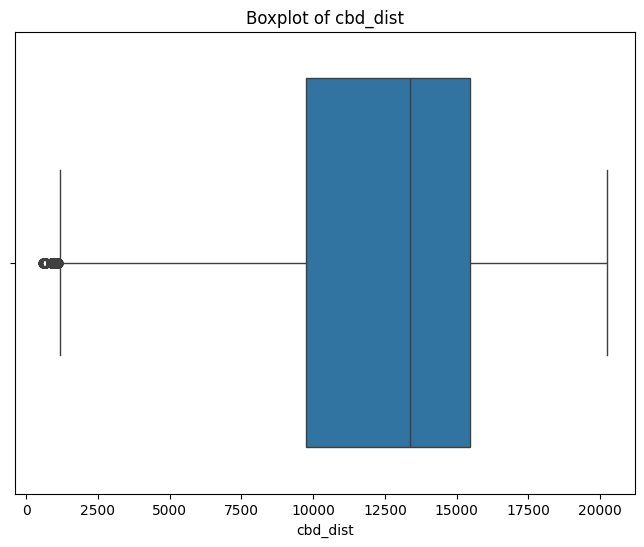

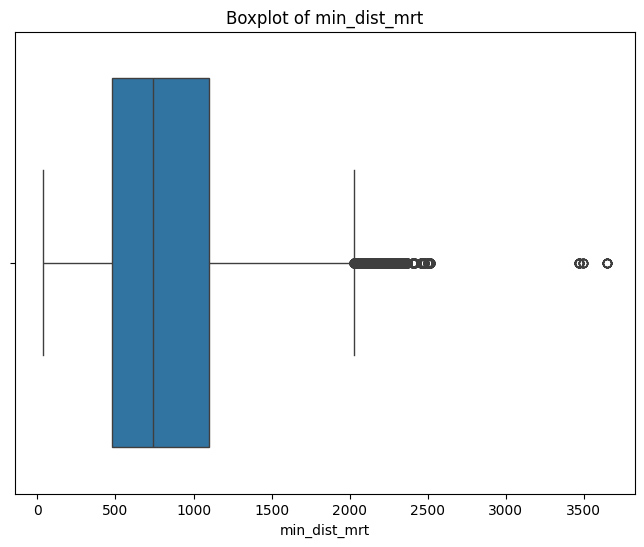

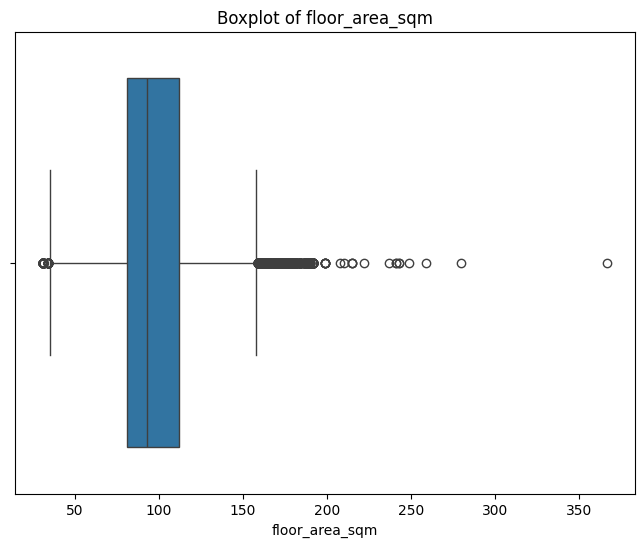

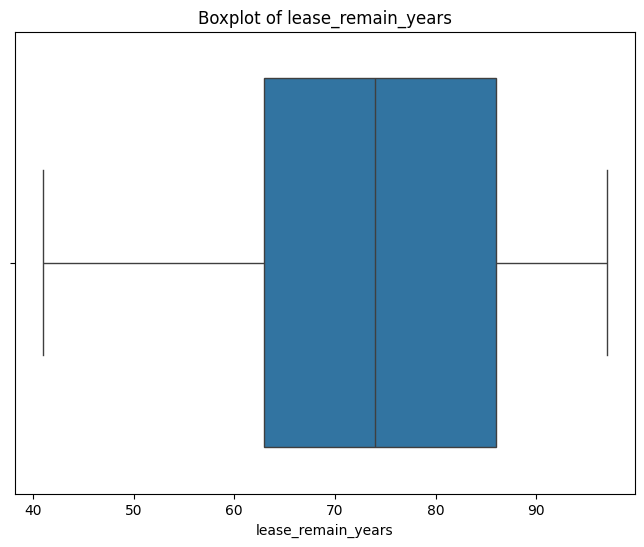

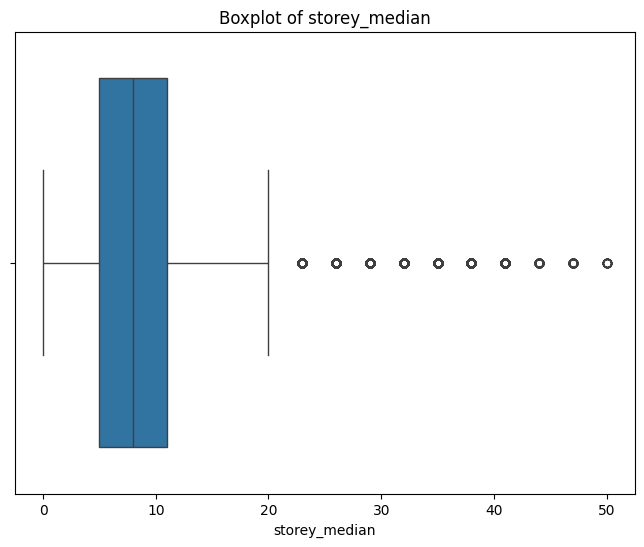

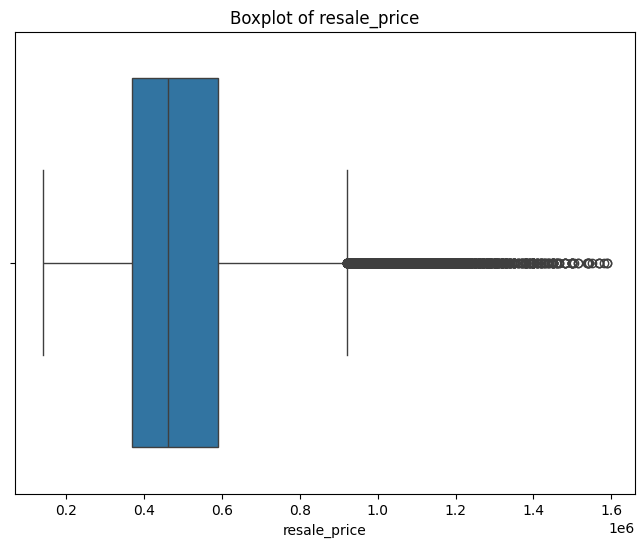

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

# List of columns(continuous variables) for finding skewness
col = ['cbd_dist','min_dist_mrt','floor_area_sqm','lease_remain_years','storey_median','resale_price']

for i in col:
    plt.figure(figsize=(8, 6))  
    sns.boxplot(data=df, x=i)
    plt.title(f'Boxplot of {i}')
    plt.xlabel(i)
    plt.show()

In [12]:
df1 = scope_df

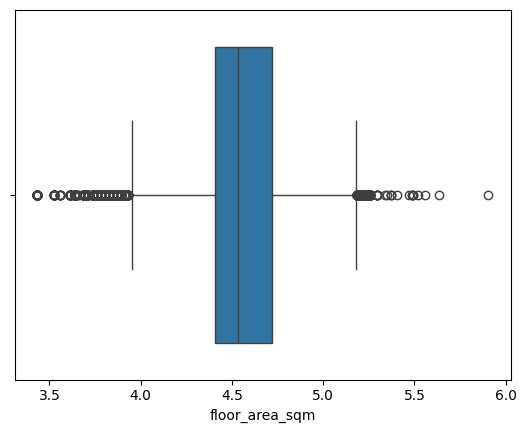

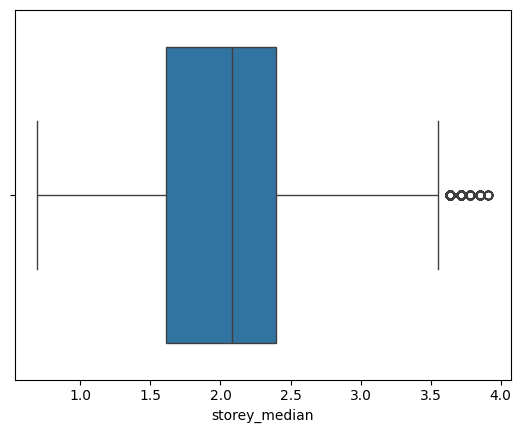

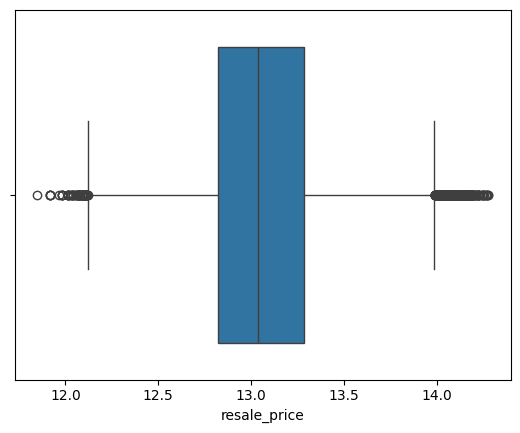

In [14]:
# Apply a logarithmic transformation to the required columns only.
# One need to apply it and check, in some cases it will handle the skewness, and in other cases it might not have a great 
                                                                # effect on the data, so no need to apply for that columns
    
df1['floor_area_sqm'] = np.log(df1['floor_area_sqm'])
sns.boxplot(x='floor_area_sqm', data=df1)
plt.show()

df1['storey_median'] = np.log(df1['storey_median'])
sns.boxplot(x='storey_median', data=df1)
plt.show()

df1['resale_price'] = np.log(df1['resale_price'])
sns.boxplot(x='resale_price', data=df1)
plt.show()

In [15]:
df1.dtypes

cbd_dist              float64
min_dist_mrt          float64
floor_area_sqm        float64
lease_remain_years      int64
storey_median         float64
resale_price          float64
dtype: object

# Visualization among different columns using Correlation Matrix

<Axes: title={'center': 'Correlation Heatmap'}>

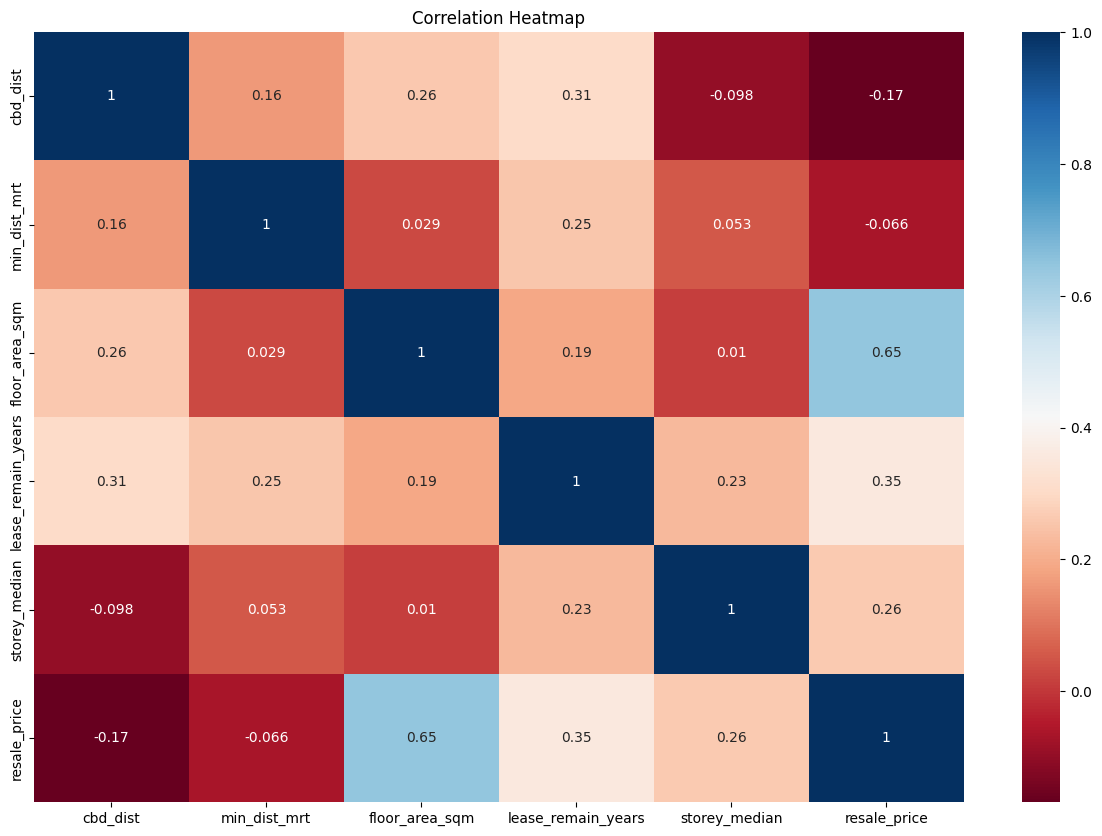

In [16]:
import seaborn as sns

corrMatrix = df1.corr()
plt.figure(figsize=(15, 10))
plt.title("Correlation Heatmap")
sns.heatmap(
    corrMatrix, 
    xticklabels=corrMatrix.columns,
    yticklabels=corrMatrix.columns,
    cmap='RdBu', 
    annot=True
)

# Encoding Data

In [18]:
!pip install scikit-learn

  Using cached scikit_learn-1.6.0-cp310-cp310-win_amd64.whl.metadata (15 kB)
  Using cached scipy-1.14.1-cp310-cp310-win_amd64.whl.metadata (60 kB)
  Using cached joblib-1.4.2-py3-none-any.whl.metadata (5.4 kB)
  Using cached threadpoolctl-3.5.0-py3-none-any.whl.metadata (13 kB)
Using cached scikit_learn-1.6.0-cp310-cp310-win_amd64.whl (11.1 MB)
Using cached joblib-1.4.2-py3-none-any.whl (301 kB)
Using cached scipy-1.14.1-cp310-cp310-win_amd64.whl (44.8 MB)
Using cached threadpoolctl-3.5.0-py3-none-any.whl (18 kB)


In [20]:
df1

,cbd_dist,min_dist_mrt,floor_area_sqm,lease_remain_years,storey_median,resale_price
0,1351.713661,143.728945,4.304065,63,1.609438,12.868761
1,1351.713661,143.728945,4.219508,62,2.079442,12.765688
2,1351.713661,143.728945,4.219508,61,2.079442,12.736701
3,1351.713661,143.728945,4.219508,61,2.079442,12.682307
4,1351.713661,143.728945,4.219508,61,2.079442,12.821258
...,...,...,...,...,...,...
232290,2525.251132,182.864524,4.718499,91,2.995732,14.151983
232291,2525.251132,182.864524,4.521789,90,3.258097,13.987782
232292,2525.251132,182.864524,4.718499,90,3.555348,14.277986
232293,2525.251132,182.864524,4.521789,90,2.397895,13.910821


In [23]:
# Checking for NaN values
print(df1[['cbd_dist', 'min_dist_mrt', 'floor_area_sqm', 'lease_remain_years', 'storey_median']].isnull().sum())

# Checking for Infinity values
print(np.isinf(df1[['cbd_dist', 'min_dist_mrt', 'floor_area_sqm', 'lease_remain_years', 'storey_median']]).sum())


cbd_dist              0
min_dist_mrt          0
floor_area_sqm        0
lease_remain_years    0
storey_median         0
dtype: int64
cbd_dist              0
min_dist_mrt          0
floor_area_sqm        0
lease_remain_years    0
storey_median         1
dtype: int64


In [24]:
df1[['cbd_dist', 'min_dist_mrt', 'floor_area_sqm', 'lease_remain_years', 'storey_median']] = df1[['cbd_dist', 'min_dist_mrt', 'floor_area_sqm', 'lease_remain_years', 'storey_median']].fillna(df1.median())


In [25]:
df1 = df1.replace([np.inf, -np.inf], np.nan)
df1[['cbd_dist', 'min_dist_mrt', 'floor_area_sqm', 'lease_remain_years', 'storey_median']] = df1[['cbd_dist', 'min_dist_mrt', 'floor_area_sqm', 'lease_remain_years', 'storey_median']].fillna(df1.median())


In [26]:
from sklearn.preprocessing import StandardScaler

X=df1[['cbd_dist','min_dist_mrt','floor_area_sqm','lease_remain_years','storey_median']]
y=df1['resale_price']

# Normalizing the encoded data
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [27]:
print(np.isnan(X).sum())  # Check for NaN
print(np.isinf(X).sum())  # Check for Infinity


0
0


In [28]:
test_dataframe = pd.DataFrame(X)
test_dataframe

,0,1,2,3,4
0,-2.531002,-1.485922,-0.930436,-0.809017,-0.441808
1,-2.531002,-1.485922,-1.258385,-0.882780,0.212841
2,-2.531002,-1.485922,-1.258385,-0.956543,0.212841
3,-2.531002,-1.485922,-1.258385,-0.956543,0.212841
4,-2.531002,-1.485922,-1.258385,-0.956543,0.212841
...,...,...,...,...,...
229639,-2.263504,-1.400781,0.676910,1.256353,1.489105
229640,-2.263504,-1.400781,-0.086014,1.182590,1.854542
229641,-2.263504,-1.400781,0.676910,1.182590,2.268572
229642,-2.263504,-1.400781,-0.086014,1.182590,0.656402


# Splitting the Data for Training and Testing Purposes

In [29]:
from sklearn.model_selection import train_test_split

# test and train split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

# Decision Tree Regressor

In [30]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import GridSearchCV

# Decision Tree Regressor
dtr = DecisionTreeRegressor()

# hyperparameters
param_grid = {
    'max_depth': [2, 5, 10, 15, 20, 22],
    'min_samples_split': [2, 3, 4, 5],
    'min_samples_leaf': [2, 3, 4, 5, 6, 7, 8, 9, 10, 15, 20],
    'max_features': ['auto', 'sqrt', 'log2']
}

# gridsearchcv
grid_search = GridSearchCV(estimator=dtr, param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train)
print("Best hyperparameters:", grid_search.best_params_)
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

# evalution metrics
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
print(" ")
print('Mean squared error:', mse)
print('Mean Absolute Error', mae)
print('Root Mean squared error:', rmse)
print(" ")
print('R-squared:', r2)

Best hyperparameters: {'max_depth': 22, 'max_features': 'sqrt', 'min_samples_leaf': 4, 'min_samples_split': 3}
 
Mean squared error: 0.012361792724818159
Mean Absolute Error 0.07993685510256794
Root Mean squared error: 0.11118359917190196
 
R-squared: 0.8899984861555728


# Testing Our Trained Model (Decision Tree Regressor)

In [31]:
new_sample = np.array([[8740, 999, np.log(44), 55, np.log(11)]])
new_sample = scaler.transform(new_sample[:, :5])
new_pred = best_model.predict(new_sample)[0]
np.exp(new_pred)

np.float64(245620.21002439185)

In [32]:
# Saving the model
import pickle
with open('model.pkl', 'wb') as file:
    pickle.dump(best_model, file)
with open('scaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)